<a href="https://colab.research.google.com/github/shubhamgoswami3549/SMS-Spam-Classifier/blob/main/SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
📤 Upload CSV/XLSX with columns: 'label', 'message' (or Cancel to use default)


Saving custom_spam_dataset.csv to custom_spam_dataset.csv

📂 DATASET LOADED SUCCESSFULLY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    8 non-null      object
 1   message  8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes


📊 CLASS DISTRIBUTION

label
ham     4
spam    4
Name: count, dtype: int64

📈 COUNT PLOT



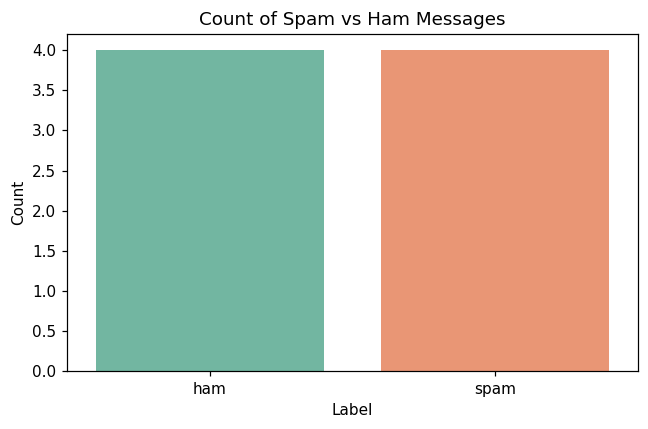


🥧 PIE CHART



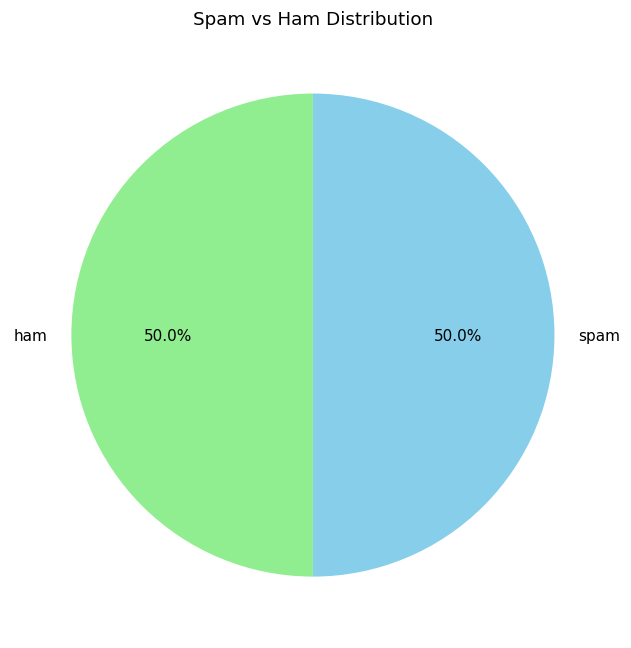


☁️ WORD CLOUDS



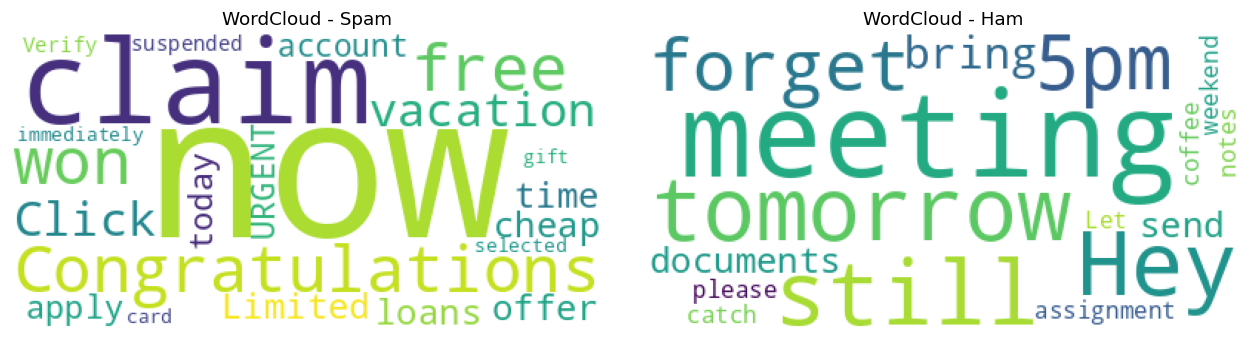


🧠 TF-IDF VECTORIZATION

Vectorized shape: (8, 38)

🔀 TRAIN/TEST SPLIT

Train: (6, 38), Test: (2, 38)

🤖 TRAIN MODEL (MultinomialNB)

Model trained.

📈 MODEL EVALUATION

✅ Accuracy: 50.00%

📑 Classification Report:
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67         1
        spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



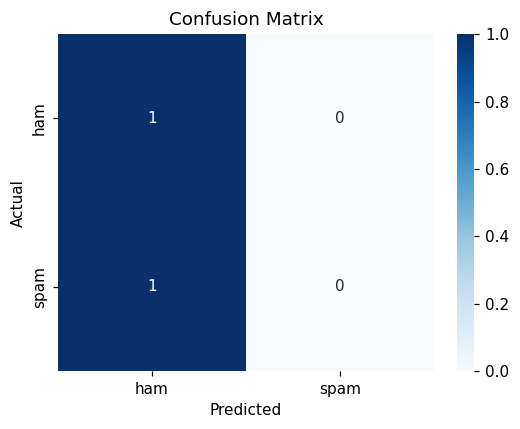


🔑 TOP FEATURES PER CLASS


🔝 Top 20 words for HAM:
today: -3.789
send: -3.789
notes: -3.789
ve: -3.789
vacation: -3.789
urgent: -3.789
verify: -3.789
won: -3.789
don: -3.410
documents: -3.410
forget: -3.410
bring: -3.410
catch: -3.384
let: -3.384
coffee: -3.384
weekend: -3.384
hey: -3.371
5pm: -3.371
tomorrow: -3.371
meeting: -3.189

🔝 Top 20 words for SPAM:
verify: -3.818
urgent: -3.818
today: -3.498
time: -3.498
loans: -3.498
offer: -3.498
cheap: -3.498
apply: -3.498
limited: -3.498
click: -3.491
vacation: -3.491
free: -3.491
congratulations: -3.491
ve: -3.491
won: -3.491
1000: -3.439
card: -3.439
gift: -3.439
selected: -3.439
claim: -3.282

💾 SAVE ARTIFACTS

Saved: spam_model.pkl, vectorizer.pkl

📝 CUSTOM TEXT PREDICTION



In [ ]:
# 📦 Step 1: Install dependencies
!pip install wordcloud ipywidgets openpyxl --quiet

# 📊 Step 2: Imports
import io, pickle, warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Matplotlib quality & spacing
plt.rcParams["figure.dpi"] = 110

# ✨ Helper: pretty section headers
def section(title):
    print("\n" + "="*80)
    print(f"{title}")
    print("="*80 + "\n")

# ✨ Helper: safe, ordered labels & colors
LABEL_COLORS = {"ham": "lightgreen", "spam": "skyblue"}

# 📁 Step 3: Load dataset (Colab upload optional → else default URL)
try:
    from google.colab import files
    print("📤 Upload CSV/XLSX with columns: 'label', 'message' (or Cancel to use default)")
    uploaded = files.upload()
    if uploaded:
        filename = list(uploaded.keys())[0]
        if filename.lower().endswith(".csv"):
            df = pd.read_csv(filename)
        elif filename.lower().endswith(".xlsx"):
            df = pd.read_excel(filename)
        else:
            raise ValueError("Unsupported file format. Please upload CSV or XLSX.")
    else:
        raise Exception("No file uploaded. Falling back to default dataset.")
except Exception:
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    df = pd.read_csv(url, sep="\t", names=["label", "message"])

# 🔧 Normalize/validate columns
if not {"label", "message"}.issubset(df.columns):
    if df.shape[1] >= 2:
        df = df.iloc[:, :2].copy()
        df.columns = ["label", "message"]
    else:
        raise ValueError("Dataset must contain at least two columns: label, message")

# Clean & standardize
df["label"] = df["label"].astype(str).str.strip().str.lower()
df["message"] = df["message"].astype(str).str.strip()
df = df.dropna(subset=["label", "message"]).reset_index(drop=True)

# 🧾 Dataset info (without printing trailing 'None')
section("📂 DATASET LOADED SUCCESSFULLY")
buf = io.StringIO()
df.info(buf=buf)
print(buf.getvalue())

section("📊 CLASS DISTRIBUTION")
counts = df["label"].value_counts()
print(counts)

# 📈 Step 4: Count Plot (fixed deprecation by using hue; legend off)
section("📈 COUNT PLOT")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="label", hue="label", legend=False, palette="Set2")
plt.title("Count of Spam vs Ham Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()

# 🧁 Step 5: Pie Chart (labels/colors follow actual order)
section("🥧 PIE CHART")
order = counts.index.tolist()
colors = [LABEL_COLORS.get(l, None) for l in order]
plt.figure(figsize=(6, 6))
counts.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    labels=order,
    colors=colors,
    ylabel=""
)
plt.title("Spam vs Ham Distribution")
plt.tight_layout()
plt.show()
plt.close()

# ☁️ Step 6: Word Clouds (robust to any text)
section("☁️ WORD CLOUDS")
spam_words = " ".join(df[df["label"] == "spam"]["message"])
ham_words  = " ".join(df[df["label"] == "ham"]["message"])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color="white").generate(spam_words))
plt.title("WordCloud - Spam")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color="white").generate(ham_words))
plt.title("WordCloud - Ham")
plt.axis("off")

plt.tight_layout(pad=3.0)  # spacing between the two clouds
plt.show()
plt.close()

# 🧠 Step 7: TF-IDF vectorization
section("🧠 TF-IDF VECTORIZATION")
X = df["message"]
y = df["label"]
vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
X_vectorized = vectorizer.fit_transform(X)
print(f"Vectorized shape: {X_vectorized.shape}")

# 🔀 Step 8: Train/Test split
section("🔀 TRAIN/TEST SPLIT")
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 🤖 Step 9: Train model
section("🤖 TRAIN MODEL (MultinomialNB)")
model = MultinomialNB()
model.fit(X_train, y_train)
print("Model trained.")

# 🧪 Step 10: Evaluation
section("📈 MODEL EVALUATION")
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc*100:.2f}%\n")

print("📑 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=model.classes_, yticklabels=model.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
plt.close()

# 🔑 Step 11: Top features per class (fixed for Naive Bayes using feature_log_prob_)
section("🔑 TOP FEATURES PER CLASS")
def show_top_features(model, vectorizer, n=20):
    feature_names = vectorizer.get_feature_names_out()
    for i, label in enumerate(model.classes_):
        # highest log-probability features for this class
        top_idx = model.feature_log_prob_[i].argsort()[-n:]
        print(f"\n🔝 Top {n} words for {label.upper()}:")
        for idx in top_idx:
            print(f"{feature_names[idx]}: {model.feature_log_prob_[i][idx]:.3f}")

show_top_features(model, vectorizer, n=20)

# 💾 Step 12: Save artifacts
section("💾 SAVE ARTIFACTS")
with open("spam_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
print("Saved: spam_model.pkl, vectorizer.pkl")

# 📝 Step 13: Interactive prediction (widgets if available, fallback to input())
section("📝 CUSTOM TEXT PREDICTION")
try:
    from ipywidgets import Text, Button, VBox, Output, Label
    from IPython.display import display

    out = Output()
    text_box = Text(placeholder="Enter a message...")
    button = Button(description="Predict", button_style="success")

    def on_click(_):
        msg = text_box.value.strip()
        with out:
            out.clear_output()
            if not msg:
                print("⚠ Please enter a message!")
                return
            vec = vectorizer.transform([msg])
            pred = model.predict(vec)[0]
            # show probability if available
            try:
                proba = model.predict_proba(vec)[0]
                probs = {cls: f"{p*100:.1f}%" for cls, p in zip(model.classes_, proba)}
                print(f"🔮 Prediction: **{pred.upper()}** | Probabilities: {probs}")
            except Exception:
                print(f"🔮 Prediction: **{pred.upper()}**")

    button.on_click(on_click)
    display(VBox([Label("Enter SMS text below:"), text_box, button, out]))
except Exception:
    # CLI fallback
    while True:
        msg = input("\nEnter a message (or type 'exit' to quit): ").strip()
        if msg.lower() == "exit":
            print("👋 Exiting... Thanks for testing!")
            break
        vec = vectorizer.transform([msg])
        pred = model.predict(vec)[0]
        try:
            proba = model.predict_proba(vec)[0]
            probs = {cls: f"{p*100:.1f}%" for cls, p in zip(model.classes_, proba)}
            print(f"🔮 Prediction: **{pred.upper()}** | Probabilities: {probs}")
        except Exception:
            print(f"🔮 Prediction: **{pred.upper()}**")
